In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#Split Data Train and Test
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

#Modelling
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve

In [9]:
df = pd.read_csv('winequality-red.csv')

In [10]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

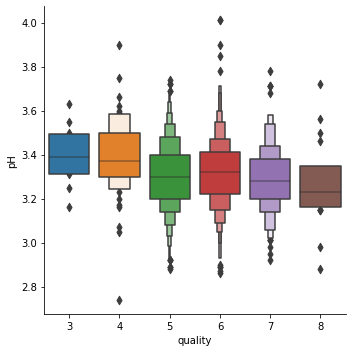

In [13]:
sns.catplot(data = df, x = 'quality', y = 'pH', kind= 'boxen')

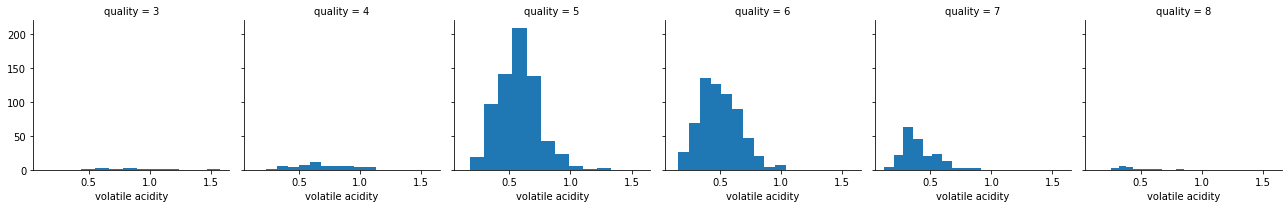

In [14]:
q = sns.FacetGrid(df, col = 'quality')
q.map(plt.hist, 'volatile acidity')

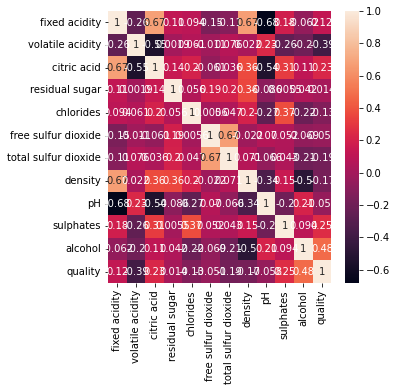

In [15]:
import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.show()


<AxesSubplot:xlabel='alcohol', ylabel='Count'>

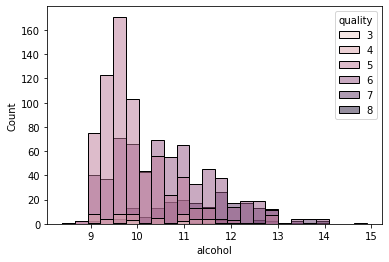

In [16]:
sns.histplot(data = df, x = 'alcohol', hue = 'quality')

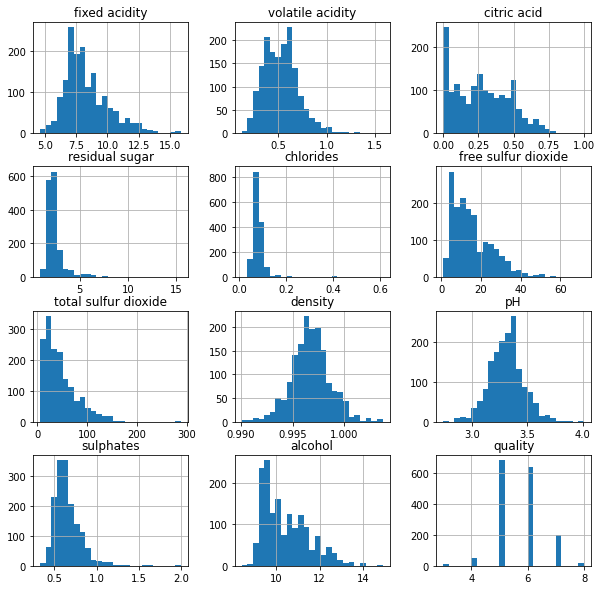

In [17]:
df.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

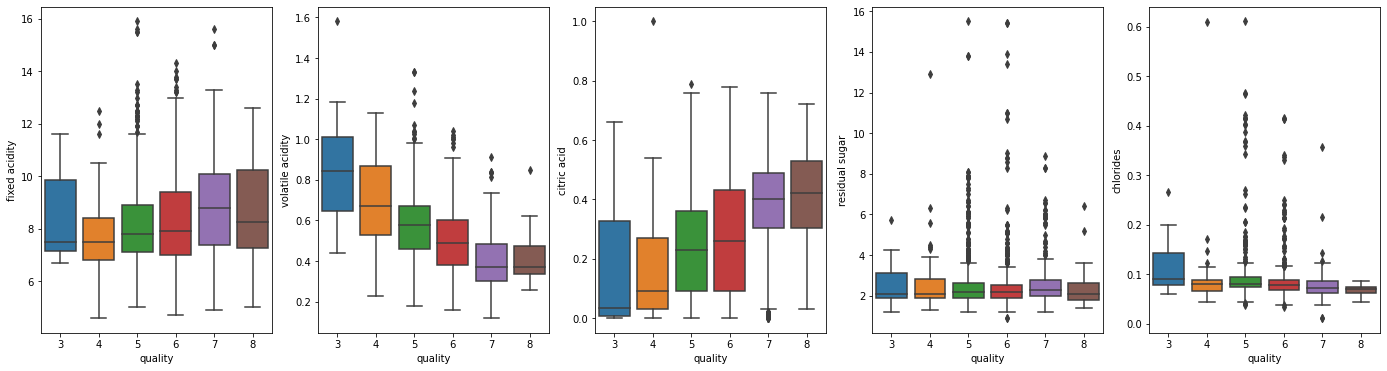

In [20]:
figure, ax = plt.subplots(1,5, figsize = (24,6))
sns.boxplot(data = df, x = "quality", y="fixed acidity", ax = ax[0])
sns.boxplot(data = df, x = "quality", y="volatile acidity", ax = ax[1])
sns.boxplot(data = df, x = "quality", y="citric acid", ax = ax[2])
sns.boxplot(data = df, x = "quality", y="residual sugar", ax = ax[3])
sns.boxplot(data = df, x = "quality", y="chlorides", ax = ax[4])
plt.show()

In [18]:
dt=df.copy()

In [19]:


dt.drop_duplicates(inplace=True)



# KNN

In [36]:
Corr=dt.corr()
Corr_res=[]
for i in range(0,len(dt.dtypes)):
    for j in range(0,len(dt.dtypes)):
        value=Corr.iloc[i:i+1,j:j+1].values
        if value>0.8 and value!=1 :
            Corr_res.append(Corr.columns[i])



In [37]:
#Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
dt.iloc[:,:-1]=std.fit_transform(dt.iloc[:,:-1]) #Standardize data set except dependent value(Quality feature)


In [38]:
#Assigning dataframe to list of array values
X=dt.iloc[:,:-1].values
Y=dt.iloc[:,-1].values


In [39]:


#Split the data set in the ratio of 80:20 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)



Text(0, 0.5, 'Error Rate')

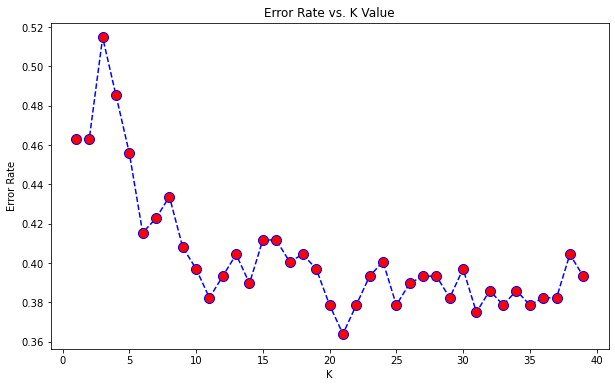

In [40]:
error_rate = []
for i in range(1, 40):
	
	knn = KNeighborsClassifier(n_neighbors = i)
	knn.fit(x_train, y_train)
	pred_i = knn.predict(x_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
				linestyle ='dashed', marker ='o',
		markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [41]:
#K=21 has lowest error rate
#Model Fit
classifier2 = KNeighborsClassifier(n_neighbors= 21, metric = 'manhattan', p = 2,weights='uniform')
classifier2.fit(x_train,y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=21)

In [42]:
#Predicting the ouput from input data (x_train) and (y_train) 
y_pred1 = classifier2.predict(x_train)
y_pred2 = classifier2.predict(x_test)


In [43]:


from sklearn.metrics import accuracy_score
print("Accuracy score of train data set:",accuracy_score(y_train, y_pred1))
print("Accuracy score of test data set:",accuracy_score(y_test, y_pred2))



Accuracy score of train data set: 0.6264949402023919
Accuracy score of test data set: 0.6139705882352942


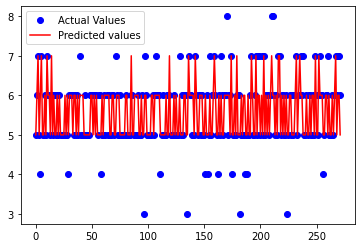

In [44]:


plt.figure()
plt.plot(y_test,'o',color = 'blue',label = 'Actual Values')
plt.plot(y_pred2,color = 'red',label = 'Predicted values')
plt.legend()



In [45]:


dt['quality'].value_counts()



5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [28]:


#If quality value is less than or eqaul to 6 then it will be in class 0
#If quality value is greater than 6  then it will be in class 1
dt['quality'] = np.where(dt['quality'] > 6, 1, 0)
dt['quality'].value_counts()



0    1175
1     184
Name: quality, dtype: int64

In [46]:
#Assigning dataframe to list of array values
X = dt.drop(['quality'], axis = 1).values
y = dt['quality'].values


In [47]:


#Splitting the data in the proportion of 70:30 and 86:14
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                   test_size = 0.3,
                                                   random_state = 1111)



In [48]:


k = range(1,50,2)
testing_accuracy = []
training_accuracy = []
score = 0
#Fitting the model
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    pipe_knn.fit(X_train, y_train)
    
    y_pred_train = pipe_knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = pipe_knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score', score, 'Best K-Score', best_k)



Best Accuracy Score 0.6151960784313726 Best K-Score 49


#Logistec Regression

In [49]:
#Logistic Regression
X1=dt[['volatile acidity','alcohol','sulphates','citric acid']]
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
score5=cross_val_score(LR,X,Y,cv=5)
score10=cross_val_score(LR,X,Y,cv=10)

print('Score mean5:' ,score5.mean())
print('Score mean10:' ,score10.mean())

Score mean5: 0.5754476883004125
Score mean10: 0.5805555555555555


#Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [51]:
# Split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [75]:


# Create a Decision Tree
dt_basic = DecisionTreeClassifier(max_depth=10)
# Fit the training data
dt_basic.fit(x_train,y_train)
# Predict based on test data
y_preds = dt_basic.predict(x_test)



In [53]:
from sklearn import metrics
# Calculate Accuracy
accuracy_value = metrics.accuracy_score(y_test,y_preds)
accuracy_value



0.5318627450980392

In [54]:
# Create and print confusion matrix
confusion_matrix(y_test,y_preds)

NameError: name 'confusion_matrix' is not defined

In [55]:
print(classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.57      0.65      0.61       165
           6       0.53      0.52      0.53       163
           7       0.49      0.40      0.44        55
           8       0.40      0.50      0.44         4

    accuracy                           0.53       408
   macro avg       0.33      0.35      0.34       408
weighted avg       0.51      0.53      0.52       408



In [56]:
dt_basic.tree_.node_count

375

In [76]:
# Create a Parameter grid
param_grid = {
    'max_depth' : range(4,20,4),
    'min_samples_leaf' : range(20,200,40),
    'min_samples_split' : range(20,200,40),
    'criterion' : ['gini','entropy'] 
}
n_folds = 5


In [59]:


dtree = DecisionTreeClassifier()
grid = GridSearchCV(dtree, param_grid, cv = n_folds, n_jobs = -1,return_train_score=True)



In [60]:


grid.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 20, 4),
                         'min_samples_leaf': range(20, 200, 40),
                         'min_samples_split': range(20, 200, 40)},
             return_train_score=True)

In [77]:
grid.best_params_


{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 20,
 'min_samples_split': 140}

In [78]:


grid.best_score_



0.5856654725819785

In [63]:


best_grid = grid.best_estimator_
best_grid



DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=140)

In [62]:


best_grid.fit(x_train,y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=20,
                       min_samples_split=100)

In [64]:
y_preds = best_grid.predict(x_test)


In [65]:


# Calculate Accuracy
accuracy_value = metrics.accuracy_score(y_test,y_preds)
accuracy_value



0.5073529411764706

In [66]:


# Create and print confusion matrix
confusion_matrix(y_test,y_preds)



NameError: name 'confusion_matrix' is not defined

In [67]:


print(classification_report(y_test,y_preds))



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.53      0.67      0.59       165
           6       0.48      0.45      0.47       163
           7       0.50      0.40      0.44        55
           8       0.00      0.00      0.00         4

    accuracy                           0.51       408
   macro avg       0.25      0.25      0.25       408
weighted avg       0.47      0.51      0.49       408



# Bagging

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.47058824, 0.47058824, 0.47058824, 0.46691176, 0.48708487])

In [71]:
scores.mean()

0.4731522682873887

In [73]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(x_train, y_train)
bag_model.oob_score_

0.5888538380651945

In [74]:
bag_model.fit(x_test, y_test)
bag_model.oob_score_

0.5808823529411765

In [ ]:
#roc curve
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
fpr, tpr, _ = metrics.roc_curve(pd.get_dummies(y_test)['Red Wines'], 
                                preds_grid[:,0])
auc1 = metrics.auc(fpr,tpr) 

plt.plot(fpr, tpr,label='AUC Grid Search Best Estimator: %0.2f' % auc1,
         color='red', linewidth=2)

fpr, tpr, _ = metrics.roc_curve(pd.get_dummies(y_test)['Red Wines'], 
                                preds_rf[:,0])
auc1 = metrics.auc(fpr,tpr) 

plt.plot(fpr, tpr,label='AUC Default Random Forest: %0.2f' % auc1,
         color='blue', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', lw=1) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate') 
plt.title('ROC') 
plt.grid(True)
plt.legend(loc="lower right")


In [22]:
corr_matrix = df.corr()

corr_list = corr_matrix.quality.abs().sort_values(ascending=False).index[0:]

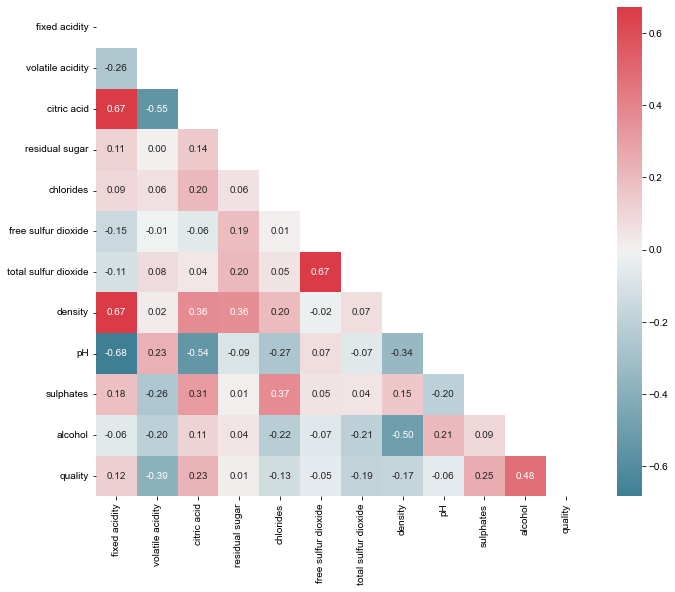

In [23]:
plt.figure(figsize=(11,9))

dropSelf = np.zeros_like(corr_matrix)

dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

In [24]:
from scipy.stats import norm 

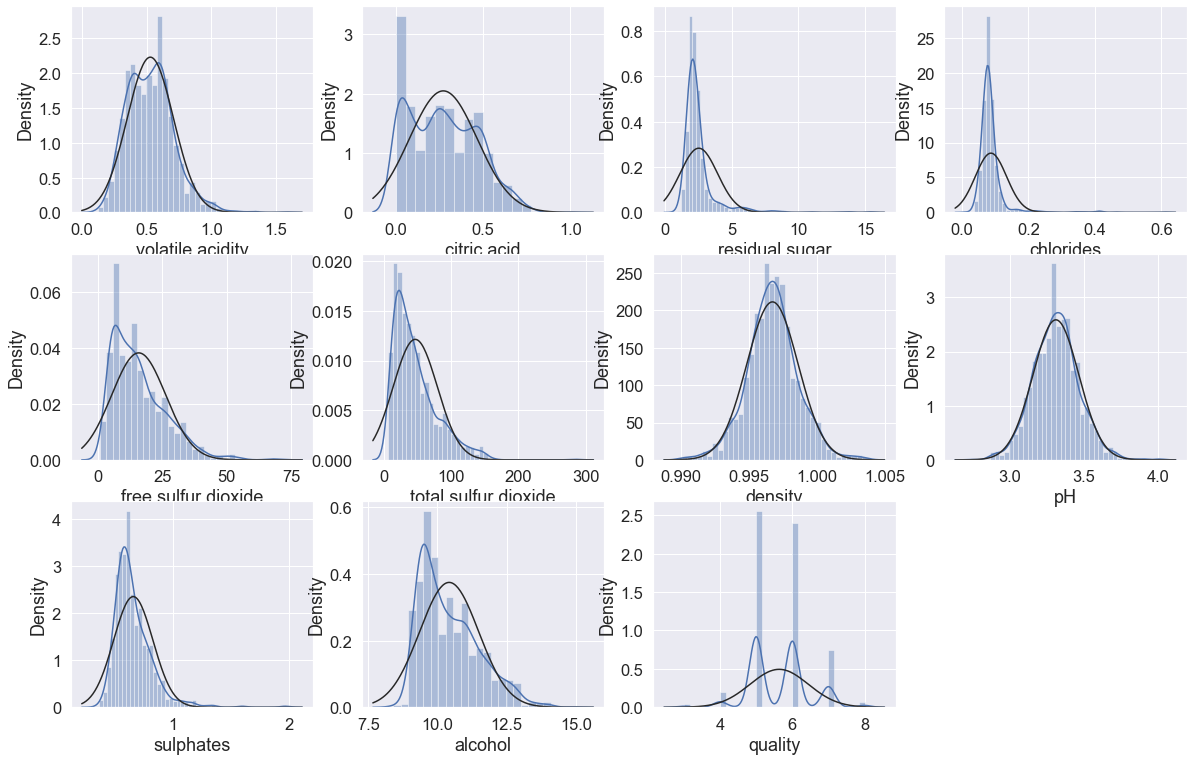

In [27]:
plt.figure(figsize = (20,22))

for i in range(1,12):
    
    plt.subplot(5,4,i)
    
    sns.distplot(df[df.columns[i]], fit=norm)

In [31]:
df_bins= df.copy()

In [32]:
bins = [0,5,10]


labels = [0, 1] # 'low'=0, 'high'=1

df_bins['quality_range']= pd.cut(x=df['quality'], bins=bins, labels=labels)

print(df_bins[['quality_range','quality']].head(5))

df_bins = df_bins.drop('quality', axis=1) 

  quality_range  quality
0             0        5
1             0        5
2             0        5
3             1        6
4             0        5


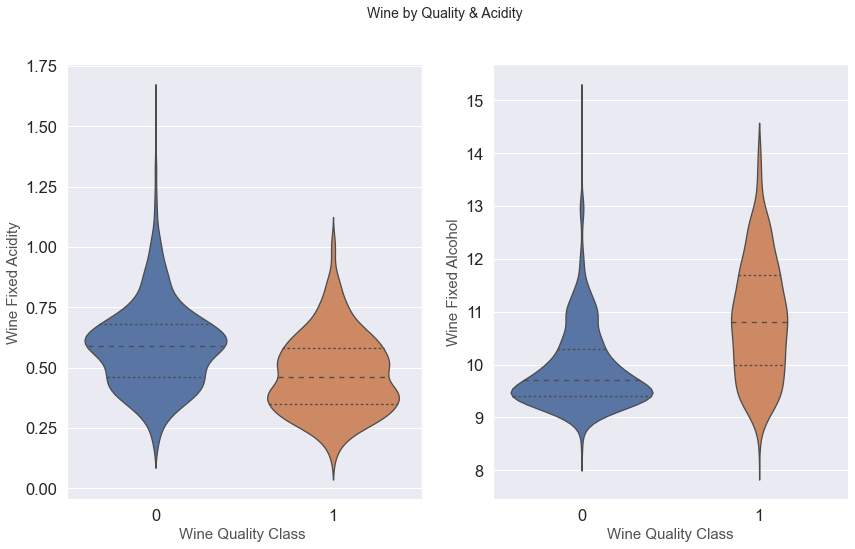

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

f.suptitle('Wine by Quality & Acidity', fontsize=14)

sns.violinplot(x='quality_range', y='volatile acidity', data=df_bins, split=True, inner='quart', linewidth=1.3,
                ax=ax1)

ax1.set_xlabel("Wine Quality Class ",size = 15,alpha=0.8)

ax1.set_ylabel("Wine Fixed Acidity",size = 15,alpha=0.8)

sns.violinplot(x='quality_range', y='alcohol', data=df_bins, split=True, inner='quart', linewidth=1.3,
                ax=ax2)

ax2.set_xlabel("Wine Quality Class",size = 15,alpha=0.8)

ax2.set_ylabel("Wine Fixed Alcohol",size = 15,alpha=0.8)

plt.show()